<a href="https://colab.research.google.com/github/divyansh212/AI-MODELS-/blob/main/Content_Based_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#step 1:importing modules
import numpy as np
import pandas as pd

In [13]:
#step 2:Structuring data
movies=pd.read_csv("tmdb_5000_movies.csv.zip")
credits=pd.read_csv("tmdb_5000_credits.csv.zip")
movies=movies.merge(credits,on="title")
movies=movies[["id","genres","keywords","title","overview","cast","crew"]]

In [14]:
#step 3:Define key columns
#genre,id,keywords(tags),title,overview,caste,crew
movies.head(1)

,id,genres,keywords,title,overview,cast,crew
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


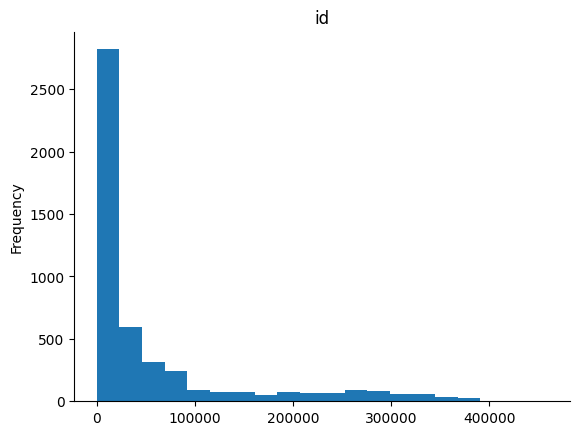

In [15]:
# @title id

from matplotlib import pyplot as plt
movies['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
#Step 4:Create Tags
#id,title, Tags
import ast
movies.dropna(inplace=True)
def convertion(obj):
  L=[]
  for i in ast.literal_eval(obj):
    L.append(i["name"])
  return L
def convertion2(obj):
  L=[]
  counter=0
  for i in ast.literal_eval(obj):
    if(counter==3):
      break
    L.append(i["name"])
    counter+=1
  return L
def director(obj):
  L=[]
  for i in ast.literal_eval(obj):
    if i["job"]=="Director":
      L.append(i["name"])
      break
  return L
movies["genres"]=movies["genres"].apply(convertion)
movies["keywords"]=movies["keywords"].apply(convertion)
movies["cast"]=movies["cast"].apply(convertion2)
movies["crew"]=movies["crew"].apply(director)
movies["overview"]=movies["overview"].apply(lambda x:x.split())
movies["genres"]=movies["genres"].apply(lambda x:[i.replace(" ","")for i in x])
movies["keywords"]=movies["keywords"].apply(lambda x:[i.replace(" ","")for i in x])
movies["cast"]=movies["cast"].apply(lambda x:[i.replace(" ","")for i in x])
movies["crew"]=movies["crew"].apply(lambda x:[i.replace(" ","")for i in x])
#creatung tags
movies["Tags"]=movies["overview"]+movies["genres"]+movies["keywords"]+movies["cast"]+movies["crew"]
new_movies=movies[["id","title","Tags"]]
new_movies["Tags"]=new_movies["Tags"].apply(lambda x:" ".join(x))
new_movies["Tags"]=new_movies["Tags"].apply(lambda x:x.lower())
new_movies.head()

/tmp/ipython-input-3000878727.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies["Tags"]=new_movies["Tags"].apply(lambda x:" ".join(x))
/tmp/ipython-input-3000878727.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies["Tags"]=new_movies["Tags"].apply(lambda x:x.lower())


,id,title,Tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [17]:
#Vectorization of tags
from sklearn.feature_extraction.text import CountVectorizer#class
cv=CountVectorizer(max_features=10000,stop_words="english")#object creation
vectors=cv.fit_transform(new_movies["Tags"]).toarray()
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zooey', 'zooeydeschanel', 'zookeeper'],
      dtype=object)

In [18]:
import nltk
from nltk .stem.porter import PorterStemmer
stemming=PorterStemmer()
def stem(text):
  y=[]
  for i in text.split():
   y.append(stemming.stem(i))
  return " ".join(y)

new_movies=new_movies["Tags"].apply(stem)


In [19]:
from sklearn.metrics.pairwise import cosine_similarity
similar=cosine_similarity(vectors)

In [20]:
def recommand(movie):
  movie_index=new_movies[new_movies["title"]==movie].index[0]
  distances=similar[movie_index]
  movie_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
  for i in movie_list:
    print(i[0])

In [21]:
recommand(movie="Avatar")

KeyError: 'title'